In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/navyaprasad/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import sent_tokenize
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import sent_tokenize
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


import pandas as pd

data = pd.read_csv('newdata/test.csv')

In [ ]:
data

,text,summary
0,Generative Adversarial Networks (GANs) are n...,On the Role of Receptive Field in Unsupervised...
1,"Humanitarian crises, such as the 2014 West A...",On the interplay of data and cognitive bias in...
2,One of the most widely used chiroptical spec...,Enhanced molecular chiral signals via molecula...
3,For a graph consisting of parallel connected...,Characteristic functions under series and para...
4,Results of the application of pattern recogn...,A Selection of Giant Radio Sources from NVSS
...,...,...
1995,An optimised subsea system design for energy...,Design Optimisation of Power-Efficient Submari...
1996,We apply a diagrammatic expansion method aro...,Anisotropy of the Energy Gap in the Insulating...
1997,In this paper we partially resolve Hall's co...,Hall's Conjecture on Extremal Sets for Random ...
1998,This paper is concerned with the deployment ...,Distributed Adaptive Coverage Control of Diffe...


## Data Preparation

In [ ]:
# Initialize a TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Vectorize the 'text' column for simplicity
X = vectorizer.fit_transform(data['text'])

# Use the 'summary' column as labels (converted to numeric if necessary)
y = data['summary']  # This would normally require some form of preprocessing to be useful for SVM

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the shape of the training and testing data
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1600, 17542), (400, 17542), (1600,), (400,))

## Training

In [ ]:
# Create a DataFrame from the X_train and y_train
train_dataset = pd.DataFrame({'text': X_train, 'sentiment': y_train})

# Display the combined training dataset
train_dataset.head()

,text,sentiment
968,"(0, 193)\t0.1401845897929276\n (0, 185)\t0....",Effective Majorana Mass and Neutrinoless Doubl...
240,"(0, 6443)\t0.06418574591354564\n (0, 13219)...",Orbifolds of symplectic fermion algebras
819,"(0, 4624)\t0.07542179641418101\n (0, 1954)\...",Design Ontology Supporting Model-based Systems...
692,"(0, 4650)\t0.10643870061734513\n (0, 6488)\...",Haldane phase in the sawtooth lattice: Edge st...
420,"(0, 7534)\t0.0916944887583965\n (0, 10761)\...",Update on the Direct Detection of Dark Matter ...


In [ ]:
train_dataset.to_csv('data/syv_train_reviews.csv', index=False)

## Testing

In [ ]:
# Create a DataFrame from the X_train and y_train
test_dataset = pd.DataFrame({'text': X_test, 'sentiment': y_test})

# Display the combined training dataset
test_dataset.head()

,text,sentiment
1860,"(0, 2523)\t0.09962785743771962\n (0, 12807)...",Better Process Mapping and Sparse Quadratic As...
353,"(0, 15502)\t0.39625545665694595\n (0, 5913)...",Graphs of real functions with pathological beh...
1333,"(0, 16990)\t0.10851889899301806\n (0, 9300)...",Singular Azimuthally Propagating Electromagnet...
905,"(0, 14092)\t0.12480058049494017\n (0, 4318)...",fpgaHART: A toolflow for throughput-oriented a...
1289,"(0, 1001)\t0.1171836728940683\n (0, 4627)\t...",Matter coupling in partially constrained vielb...


In [ ]:
def label_sentences(data):
    vectorizer = TfidfVectorizer()
    labeled_data = []

    for index, row in data.iterrows():
        sentences = sent_tokenize(row['text'])
        summary = row['summary']

        # Vectorize sentences and summary
        sentence_vectors = vectorizer.fit_transform(sentences + [summary])
        summary_vector = sentence_vectors[-1]
        sentence_vectors = sentence_vectors[:-1]

        # Calculate cosine similarity and label sentences
        similarities = cosine_similarity(sentence_vectors, summary_vector.reshape(1, -1)).flatten()
        labels = (similarities > 0.3).astype(int)  # Change threshold as needed

        for sentence, label in zip(sentences, labels):
            labeled_data.append({'sentence': sentence, 'label': label})

    return pd.DataFrame(labeled_data)

labeled_sentences = label_sentences(data)
print(labeled_sentences)


                                                sentence  label
0        Generative Adversarial Networks (GANs) are n...      0
1      In applications where a simulated image needs ...      1
2      This failure mode is more pronounced in cases ...      0
3      In this paper, we investigate the role of the ...      1
4      Experiments with the discriminator architectur...      0
...                                                  ...    ...
12076  We also compare the L 2 -distance based method...      0
12077    There is a commutative algebra of differenti...      0
12078  This paper presents an integral transform whic...      0
12079  The method of proof depends on properties of a...      0
12080  These properties are in the form of recurrence...      0

[12081 rows x 2 columns]


In [ ]:
# Function to preprocess data and extract features
def preprocess_and_label(data):
    vectorizer = TfidfVectorizer()
    labeled_data = []

    for index, row in data.iterrows():
        sentences = sent_tokenize(row['text'])
        summary = row['summary']

        # Vectorize sentences and summary
        sentence_vectors = vectorizer.fit_transform(sentences + [summary])
        summary_vector = sentence_vectors[-1]
        sentence_vectors = sentence_vectors[:-1]

        # Calculate cosine similarity and label sentences
        similarities = cosine_similarity(sentence_vectors, summary_vector.reshape(1, -1)).flatten()
        labels = (similarities > 0.3).astype(int)  # Change threshold as needed

        for sentence, label in zip(sentences, labels):
            labeled_data.append({'sentence': sentence, 'label': label})

    return pd.DataFrame(labeled_data)

In [ ]:
# Process and label data
labeled_sentences = preprocess_and_label(data)
X = vectorizer.fit_transform(labeled_sentences['sentence'])
y = labeled_sentences['label']


In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8928423665701283


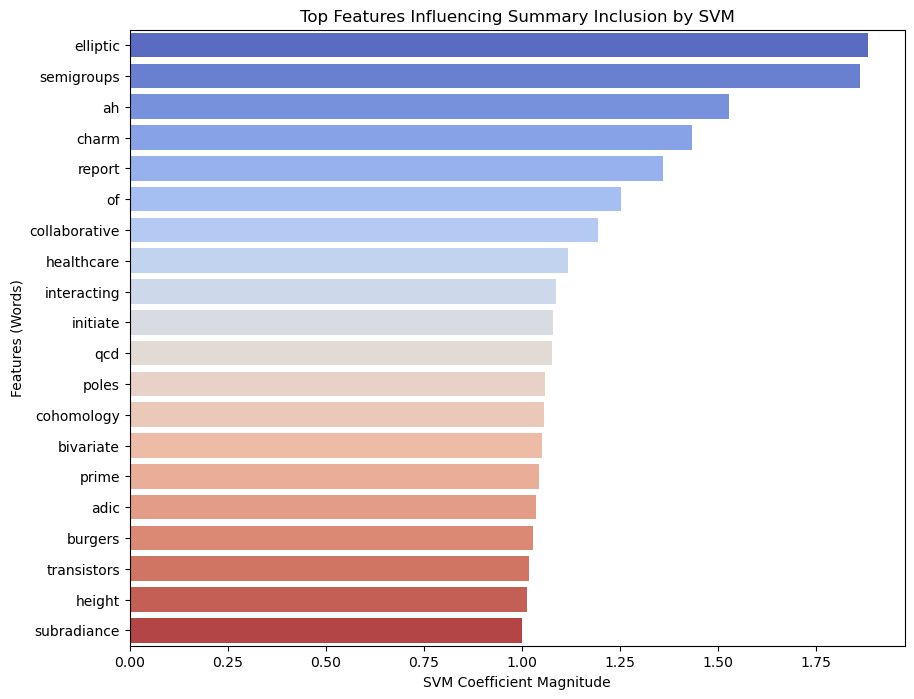

In [ ]:
def plot_feature_importance(vectorizer, model, top_n=20):
    feature_names = vectorizer.get_feature_names_out()
    svm_coefficients = model.coef_.toarray().flatten()
    sorted_coeff_indices = svm_coefficients.argsort()[::-1]

    top_features = [feature_names[index] for index in sorted_coeff_indices[:top_n]]
    top_scores = [svm_coefficients[index] for index in sorted_coeff_indices[:top_n]]

    # Plot
    plt.figure(figsize=(10, 8))
    sns.barplot(x=top_scores, y=top_features, palette='coolwarm')
    plt.xlabel('SVM Coefficient Magnitude')
    plt.ylabel('Features (Words)')
    plt.title('Top Features Influencing Summary Inclusion by SVM')
    plt.show()

plot_feature_importance(vectorizer, svm_model)


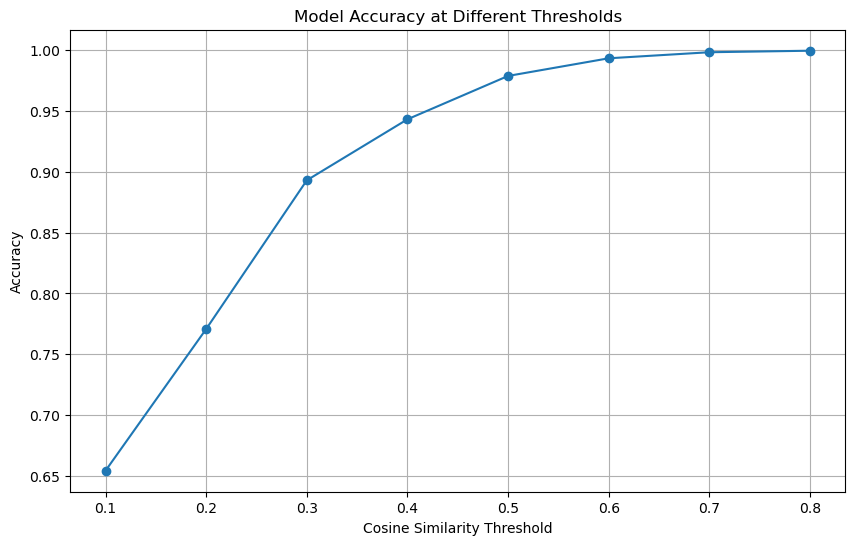

In [ ]:
vectorizer = TfidfVectorizer()

# Preprocess and compute similarities
def compute_similarities(data, vectorizer, threshold):
    labels = []
    for index, row in data.iterrows():
        sentences = sent_tokenize(row['text'])
        summary = row['summary']

        # Vectorize sentences and summary
        all_texts = sentences + [summary]
        all_vectors = vectorizer.fit_transform(all_texts)
        summary_vector = all_vectors[-1]
        sentence_vectors = all_vectors[:-1]

        # Calculate cosine similarity
        similarities = cosine_similarity(sentence_vectors, summary_vector.reshape(1, -1)).flatten()
        label = (similarities > threshold).astype(int)
        labels.extend(label)

    return labels

# Evaluate model at different thresholds
thresholds = np.arange(0.1, 0.9, 0.1)
accuracies = []
all_sentences = [sent for text in data['text'] for sent in sent_tokenize(text)]
sentence_vectors = vectorizer.fit_transform(all_sentences)

for thresh in thresholds:
    labels = compute_similarities(data, vectorizer, thresh)
    X_train, X_test, y_train, y_test = train_test_split(sentence_vectors, labels, test_size=0.2, random_state=42)

    svm_model = SVC(kernel='linear')
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot accuracies
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracies, marker='o')
plt.xlabel('Cosine Similarity Threshold')
plt.ylabel('Accuracy')
plt.title('Model Accuracy at Different Thresholds')
plt.grid(True)
plt.show()


In [ ]:
new_df = pd.read_csv('data/test_reviews.csv')

In [ ]:
new_df

,text,sentiment
0,"Controller works amazing, however the seller s...",0
1,"It took a long time to arrive, and then broke ...",0
2,This fan will definitely help to cool down you...,0
3,I like these matzos better than any other. I j...,1
4,I bought the neck/shoulder wrap version of thi...,1
...,...,...
3204,The cups are super visible and don’t stay in p...,0
3205,Liked the dustpan. Broom should have been litt...,1
3206,Terrible/unrealistic special effects get out o...,0
3207,Cheap looking and the seller does not allow fo...,0


In [ ]:
# Initialize a TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Vectorize the 'text' column for simplicity
X = vectorizer.fit_transform(new_df['text'])

# Use the 'summary' column as labels (converted to numeric if necessary)
y = new_df['sentiment']  # This would normally require some form of preprocessing to be useful for SVM

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the shape of the training and testing data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2567, 7872), (642, 7872), (2567,), (642,))

Kernel: linear, C: 0.1, Accuracy: 0.8130841121495327


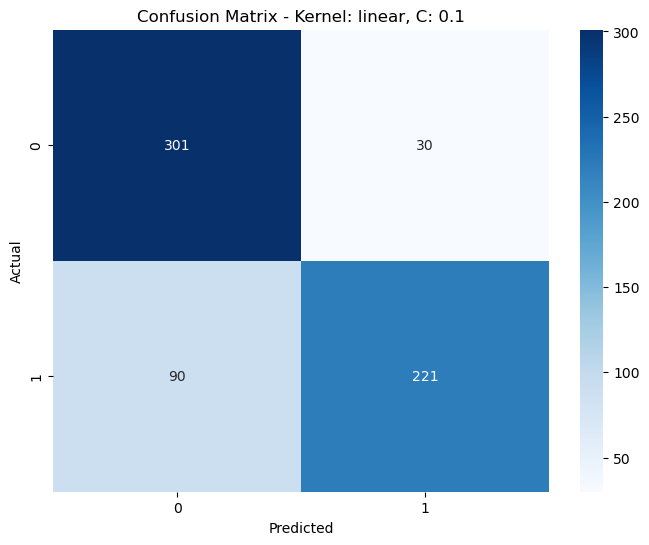

Kernel: linear, C: 1, Accuracy: 0.8364485981308412


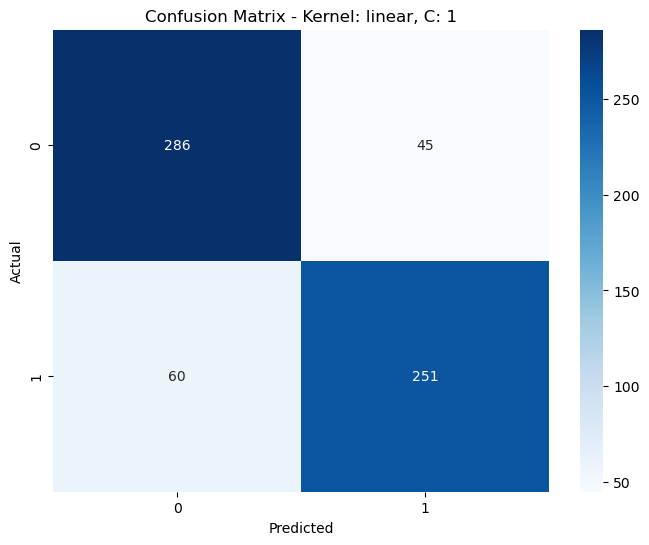

Kernel: linear, C: 10, Accuracy: 0.8130841121495327


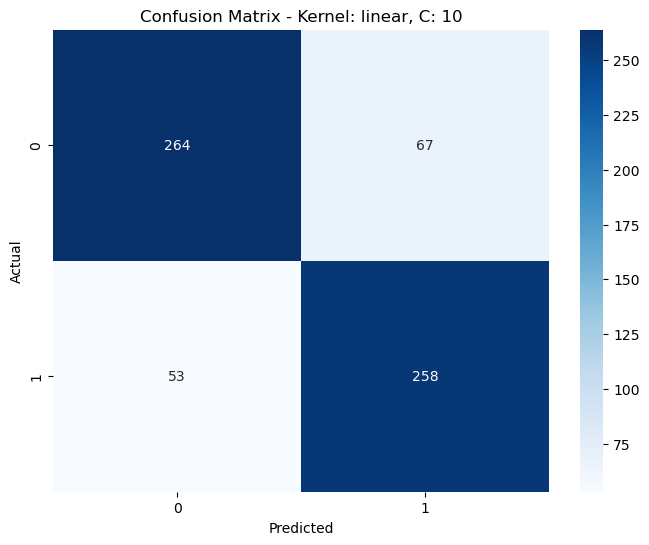

Kernel: rbf, C: 0.1, Accuracy: 0.5467289719626168


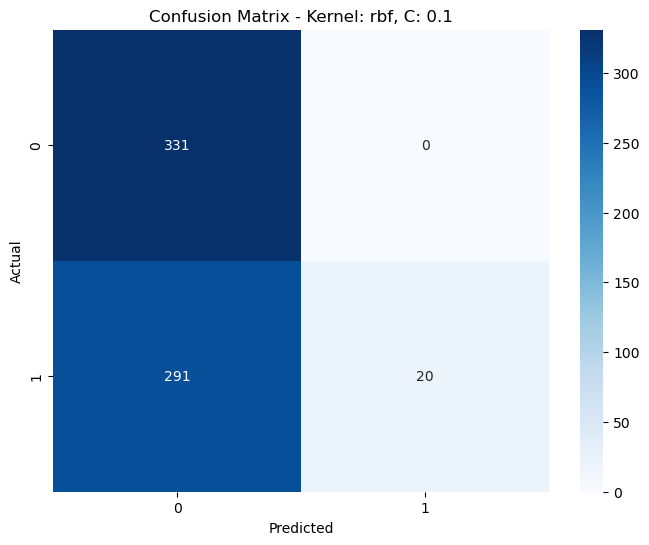

Kernel: rbf, C: 1, Accuracy: 0.8348909657320872


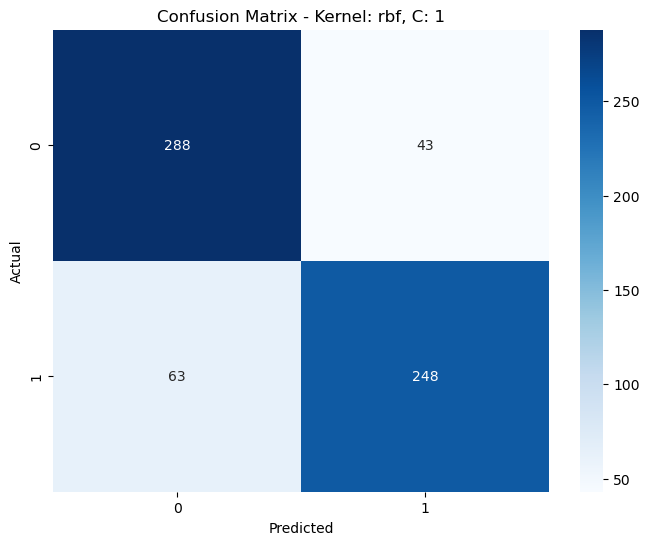

Kernel: rbf, C: 10, Accuracy: 0.8302180685358256


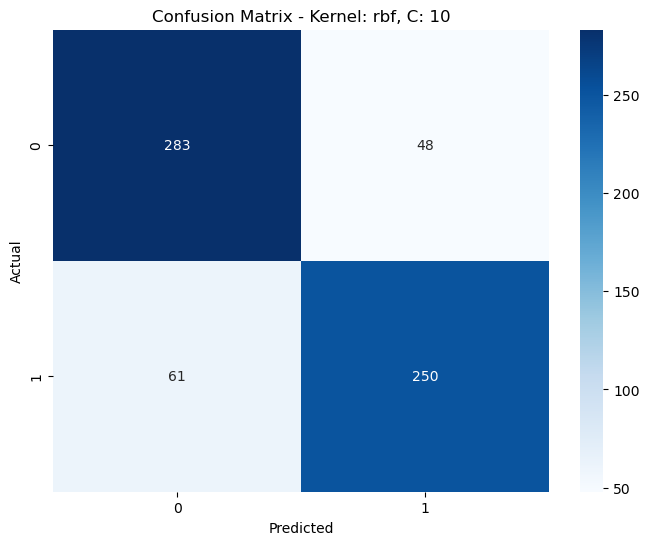

In [ ]:
# Define kernels and C values for testing
kernels = ['linear', 'rbf', 'poly']
C_values = [0.1, 1, 10]

# Initialize vectorizer
vectorizer = TfidfVectorizer()

# Placeholder for model results
results = []

# Train and evaluate models
for kernel in kernels:
    for C in C_values:
        svm_model = SVC(kernel=kernel, C=C, probability=True)
        svm_model.fit(X_train, y_train)
        y_pred = svm_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        results.append((kernel, C, svm_model, accuracy, cm))

        print(f'Kernel: {kernel}, C: {C}, Accuracy: {accuracy}')
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix - Kernel: {kernel}, C: {C}')
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.show()
